<a href="https://colab.research.google.com/github/erodsmx/Software-Catalog-2024/blob/main/KNN_PRO_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U scikit-learn

In [ ]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from numpy import array
from numpy import argmax
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from tensorflow import random
import tensorflow as tf

seed = 1
np.random.seed(seed)
random.set_seed(seed)

def imprimirResultados(y,y_pred):
  #print('MSE: ' + str(round(mean_squared_error(y, y_pred), 4))) #Error cuadratico medio
  #print("RMSE: %.4f" % (sqrt(mean_squared_error(y, y_pred)))) #Raiz del error
  print('R2: ', r2_score(y,y_pred)) # R Cuadrada
  m = tf.keras.metrics.MeanRelativeError(normalizer=y) # Error Relativo
  m.update_state(y, y_pred)
  mre = m.result().numpy()
  #print('MRE (tf): ', mre)
  pred = (1-mre)*100
  print('PRED: ', pred)
  print('-----')
  return pred

#Configuración de graficas
plt.rcParams["figure.figsize"] = (8,6) #tamaño en pulgadas
plt.rcParams.update({'font.size': 12}) #tamaño de fuente


def printPred(real,prediccion):
  plt.close("all") #limpiar lo que se haya graficado antes.
  fig = plt.figure() # Para guardar la grafica
  width = 0.3
  locs = np.arange(1, len(real)+1)
  plt.bar(locs, real, width=width,color="tomato",label='valor real') #Grafica de barras
  plt.bar(locs+1*width, prediccion, width=width, color="lightsteelblue", label='predicción') #barras
  #plt.bar(locs+2*width, z, width=width, color="black", label='z')
  plt.legend()
  x_values = np.linspace(1, 21, 21,endpoint=True) # start, stop, Number of samples to generate
  plt.xticks(x_values)
  plt.xlabel('No de Proyecto')
  plt.ylabel('Duración del proyecto (Meses)')
  plt.legend()
  plt.show()
  return fig

#Funcion para crear una lista del arreglo numpy, se utiliza al generar la grafica de barras
def crearLista(arreglo):
  def extract_tuple_value(tup):
    return tup[0]
  my_list = [tup[0] for tup in arreglo]
  return my_list

#Funciones prototipo para graficar el porcentaje de precision en cada k-Fold al realizar validacion cruzada
def kTest():
  folds =[]
  for j in range(2,11):
    cv = KFold(n_splits=j,random_state=30, shuffle=True)
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    folds.append(imprimirResultados(y,y_pred))
  return folds
def kTest2():
  r2 = []
  for j in range(2,11):
      cv = KFold(n_splits=j,random_state=30, shuffle=True)
      y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
      r2.append(r2_score(y,y_pred))
  return r2
def plotMaxkFold(folds, ejeY):
  x_values = np.linspace(2, 10, 9)
  plt.plot(x_values,folds)
  #plt.xticks(np.arange(0, 10, 1.0)) #de 1 a 30 con marca cada 2 unidades
#  plt.xticks(np.arange(0, 11, step=1))
  plt.xlabel('valor de k-Fold')
  plt.ylabel(ejeY)
#  plt.xlim(2,11)
  plt.grid(True)
  plt.title('KNN')
  print('Max: ', max(folds))
  optimo = folds.index(max(folds)) +2
  print('maximo en j=', optimo)
  plt.show()
  return None

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SimpleANN/datasetFinal.csv')
dataset.drop(["No","D","V","SalaryTeam","SprintSize","WorkDays"], axis=1, inplace=True)
dataset.head()

,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCosto
0,156,4.2,63,1200000,1,0,1
1,202,3.7,92,1600000,0,0,0
2,173,4.0,56,1000000,1,1,1
3,331,4.5,86,2100000,0,0,0
4,124,4.9,32,750000,1,2,1


# Agregando columnas al dataset original

In [ ]:
#La mejor configuracion hasta ahora es X = Effort, Size. Y = ActualTime, Size
X=dataset.iloc[:,0:2].values #Effort
y=dataset.iloc[:,2:4].values #target (ActualTime = 2:3, ActualCost = 3:4)
#Columnas: 4:5 = Size, 5:6 = SizeT, 6:7 = SizeC = 6:
X = np.append(X, dataset.iloc[:,4:7].values , axis=1)
#X = np.append(X, dataset.iloc[:,6:7].values , axis=1)
x_test = X
y_train = y
print('x_test set:')
print(x_test[0:4,:])
print('y_train set:')
print(y[0:4,:])

x_test set:
[[156.    4.2   1.    0.    1. ]
 [202.    3.7   0.    0.    0. ]
 [173.    4.    1.    1.    1. ]
 [331.    4.5   0.    0.    0. ]]
y_train set:
[[     63 1200000]
 [     92 1600000]
 [     56 1000000]
 [     86 2100000]]


In [ ]:
datasetRuido = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SimpleANN/datasetModificadoRuido.csv') #Cargar archivo CSV
datasetRuido.drop(["No","D","V","SprintSize","WorkDays","TeamSalary"], axis=1, inplace=True) #Eliminar columnas no utilizadas
datasetRuido['SizeEffort'] =  dataset['SizeEffort']
datasetRuido['SizeTime'] =  dataset['SizeTime']
datasetRuido['SizeCosto'] =  dataset['SizeCosto']
print(datasetRuido.head())

Xt = datasetRuido.iloc[:,0:2].values #Effort
Xt = np.append(Xt, datasetRuido.iloc[:,4:7].values , axis=1)
#Xt = np.append(Xt, datasetRuido.iloc[:,6:7].values , axis=1)
print('x_train shape: ',Xt.shape)
print(Xt[0:4])
x_train = Xt
#Los datos se normalizan entre cero y uno
sc = MinMaxScaler(feature_range = (0, 1)) # normalizacion para X
x_train_scaled = sc.fit_transform(x_train) # escalamiento
x_test_scaled = sc.fit_transform(x_test)

   Effort   Vi  ActualTime  ActualCost  SizeEffort  SizeTime  SizeCosto
0     158  4.1          63     1200000           1         0          1
1     205  3.7          92     1600000           0         0          0
2     170  4.1          56     1000000           1         1          1
3     329  4.4          86     2100000           0         0          0
4     123  4.8          32      750000           1         2          1
x_train shape:  (21, 5)
[[158.    4.1   1.    0.    1. ]
 [205.    3.7   0.    0.    0. ]
 [170.    4.1   1.    1.    1. ]
 [329.    4.4   0.    0.    0. ]]


# CONFIGURACIÓN DE KNN

In [ ]:
#Algoritmo KNN:
for i in range(2,4):
  KNN = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='auto', metric='minkowski', leaf_size=32)
  classifier_pipeline = make_pipeline(StandardScaler(), KNN)
  modelo = classifier_pipeline.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  imprimirResultados(y,y_pred)
  #print(str(np.around(y_pred, decimals=0)).replace(' [', '').replace('[', '').replace(']', '').replace('.', ''))

R2:  0.988855776197356
PRED:  95.79111337661743
-----
R2:  0.979274027924516
PRED:  94.63745355606079
-----


In [ ]:
classifier_pipeline = make_pipeline(StandardScaler(), KNN)
for i in range(2,11):
  print('k-Fold: ', i)
  cv = KFold(n_splits=i,random_state=30, shuffle=True)
  y_pred = cross_val_predict(classifier_pipeline, x_train, y_train, cv=cv)
  imprimirResultados(y,y_pred)
  cv_score = cross_validate(classifier_pipeline,x_train, y_train, cv=cv)
#knn = 7 vecinos, k-Fold:  7
#R2:  0.8728409381045429
#PRED:  86.77270859479904

#knn = 7 vecinos, k-Fold:  10
#R2:  0.8764533660783945
#PRED:  86.34010702371597


#knn = 2 vecinos, k-Fold:  6
#R2:  0.7881223416897917
#PRED:  80.82262873649597

k-Fold:  2
R2:  0.7280329876004713
PRED:  80.04404306411743
-----
k-Fold:  3
R2:  0.769784038675613
PRED:  81.38467073440552
-----
k-Fold:  4
R2:  0.7977191548020948
PRED:  82.63298571109772
-----
k-Fold:  5
R2:  0.8054319111893136
PRED:  82.36362636089325
-----
k-Fold:  6
R2:  0.8169222004281889
PRED:  83.3708867430687
-----
k-Fold:  7
R2:  0.8108872124264479
PRED:  83.6353749036789
-----
k-Fold:  8
R2:  0.811877823762546
PRED:  83.87848138809204
-----
k-Fold:  9
R2:  0.811668329643956
PRED:  83.86684209108353
-----
k-Fold:  10
R2:  0.809173757572486
PRED:  83.28125327825546
-----


In [ ]:
cv = KFold(n_splits=10,random_state=30, shuffle=True)
#Configuracion para: Repeats K-Fold n times with different randomization in each repetition.
rkf = RepeatedKFold(n_splits=6, n_repeats=5, random_state=42)
cv_results = cross_validate(classifier_pipeline, x_train, y_train, cv=rkf,return_estimator=True) #,

In [ ]:
cv_results

{'fit_time': array([0.00175238, 0.00725889, 0.00236845, 0.00157905, 0.00146937,
        0.00194097, 0.00151181, 0.00145149, 0.00145793, 0.00146818,
        0.00145173, 0.0015142 , 0.00144172, 0.00142407, 0.00174212,
        0.00157022, 0.00150371, 0.00152707, 0.00159192, 0.00149322,
        0.00146842, 0.00145769, 0.00150037, 0.00176907, 0.00150943,
        0.00144172, 0.00144315, 0.00143719, 0.00145531, 0.00150919]),
 'score_time': array([0.00133872, 0.00146627, 0.00149441, 0.0012486 , 0.00470066,
        0.00134921, 0.00134206, 0.0012002 , 0.00129747, 0.00118184,
        0.00119996, 0.0011797 , 0.00123549, 0.00116587, 0.00134945,
        0.00124431, 0.00119519, 0.00123453, 0.00124502, 0.0012145 ,
        0.00149512, 0.00120163, 0.0014472 , 0.00131059, 0.00119495,
        0.00121379, 0.00117779, 0.00119925, 0.00116301, 0.00117302]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('kneighborsregressor',
                   KNeighborsRegressor(leaf

R2:  0.946716265371514
PRED:  92.96819642186165
-----
R2:  0.8835768746303523
PRED:  92.99188926815987
-----
R2:  0.9655209441407089
PRED:  94.14301440119743
-----
R2:  0.971987093294479
PRED:  93.26469749212265
-----
R2:  0.9750562906900775
PRED:  93.80579553544521
-----
R2:  0.9783369050753659
PRED:  92.40576848387718
-----
R2:  0.9102000874950256
PRED:  93.67780312895775
-----
R2:  0.9597627945304027
PRED:  91.07271507382393
-----
R2:  0.9774815765801724
PRED:  93.21879670023918
-----
R2:  0.9466614862344491
PRED:  93.11299100518227
-----
R2:  0.9636614880457295
PRED:  93.61616969108582
-----
R2:  0.9661290549430142
PRED:  92.85202845931053
-----
R2:  0.8950947386102384
PRED:  93.10937747359276
-----
R2:  0.9741158361477313
PRED:  93.07768940925598
-----
R2:  0.934600149296474
PRED:  91.55354350805283
-----
R2:  0.9583306492456174
PRED:  91.90635904669762
-----
R2:  0.97537114508556
PRED:  94.32670623064041
-----
R2:  0.981695578844284
PRED:  93.58300417661667
-----
R2:  0.960305694

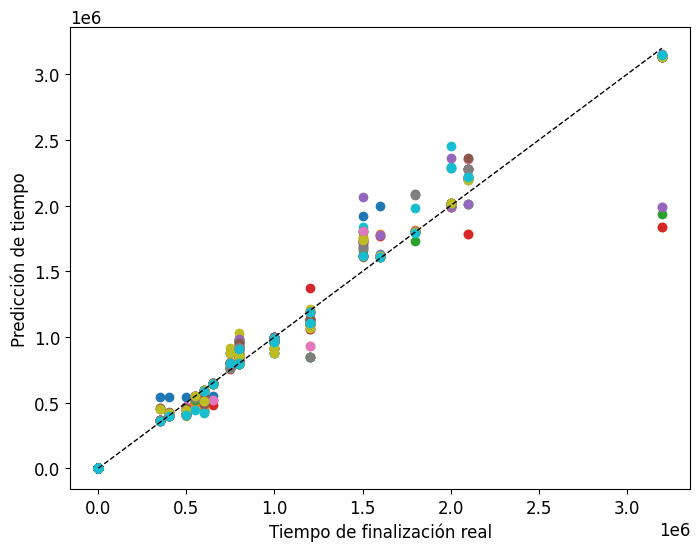

In [ ]:
fig, ax = plt.subplots()
for i in range(0,30):
  #print('i = estimador =  ',i)
  estimatorFold = cv_results.get('estimator')[i] #10
  y_test = estimatorFold.predict(x_test)
  y_time =y_test[0:-1,0:1]
  imprimirResultados(y_train,y_test)
  #print(str(np.around(y_test, decimals=0)).replace(' [', '').replace('[', '').replace(']', '').replace('.', ''))
  ax.scatter(y_train, y_test)
  ax.set_xlabel("Tiempo de finalización real")
  ax.set_ylabel("Predicción de tiempo")
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=1)
plt.show()

In [ ]:
y_train[:,0:1].shape

(21, 1)

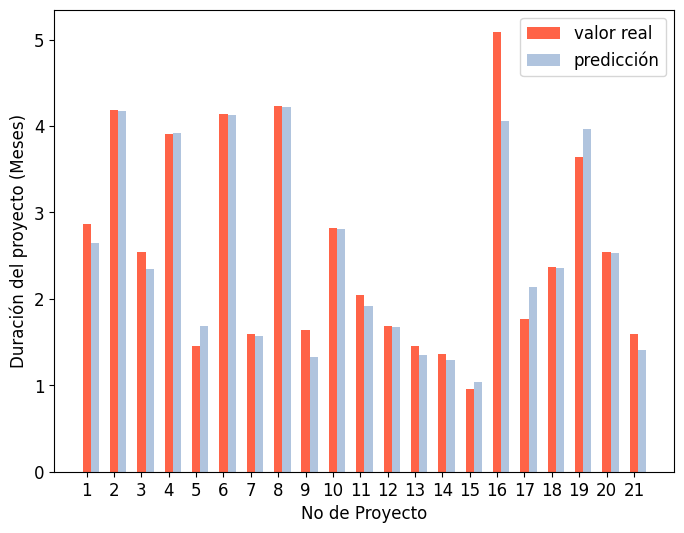

In [ ]:
WorkDays = 22
fig = printPred(crearLista(y_train/WorkDays),crearLista(y_test/WorkDays))
fig.savefig('/content/drive/MyDrive/Colab Notebooks/SimpleANN/y_ypredBarKNN.svg')

min RMSE:  234570.40333118048


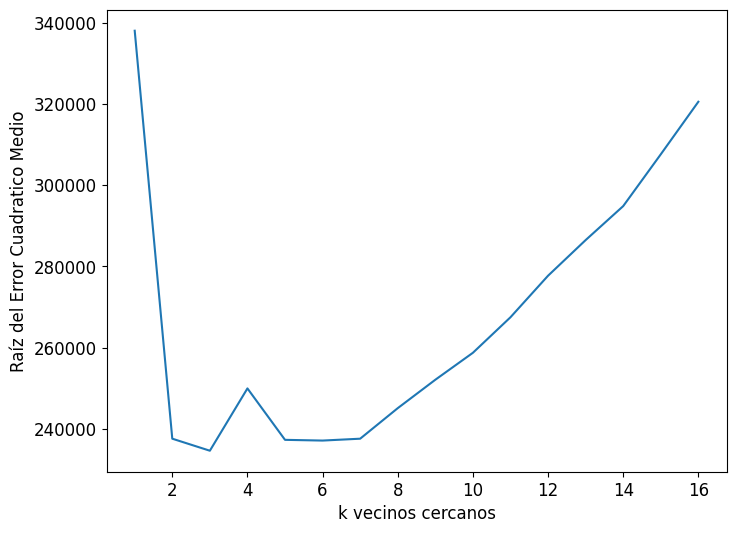

max R2:  0.8169222004281889


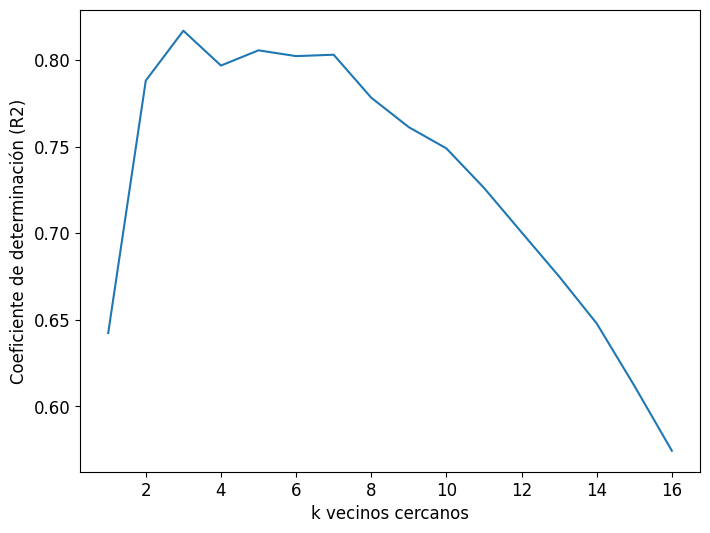

In [ ]:
#Busca el numero de vecinos que disminuye mas el error a una validacion cruzada fija.
error = []
cv = KFold(n_splits=6,random_state=30, shuffle=True)
for k in range(1,17):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k,weights='distance',algorithm='auto', metric='minkowski', leaf_size=32))
    y_pred = cross_val_predict(classifier_pipeline, x_train, y_train, cv=cv)
    error.append(sqrt(mean_squared_error(y,y_pred)))
print('min RMSE: ',min(error))
plt.close("all")
fig = plt.figure()
plt.plot(range(1,17),error)
plt.xlabel('k vecinos cercanos')
plt.ylabel('Raíz del Error Cuadratico Medio')
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/KNNtest.svg')


r2 = []
for k in range(1,17):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k,weights='distance',algorithm='auto', metric='minkowski', leaf_size=32))
    y_pred = cross_val_predict(classifier_pipeline, x_train, y_train, cv=cv)
    r2.append(r2_score(y,y_pred))
print('max R2: ',max(r2))
plt.close("all")
fig2 = plt.figure()
plt.plot(range(1,17),r2)
plt.xlabel('k vecinos cercanos')
plt.ylabel('Coeficiente de determinación (R2)')
plt.show()
fig2.savefig('/content/drive/MyDrive/Colab Notebooks/KNNtestr2.svg')

In [ ]:
# convert array into dataframe
DF = pd.DataFrame(y_pred)

# save the dataframe as a csv file
DF.to_csv("/content/drive/MyDrive/Colab Notebooks/SimpleANN/predicciones/KNN_pred.csv")